# Repaso media, varianza y covarianza

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pandas_datareader.data as web

df = pd.read_csv('weight-height.csv')
df['Height'] = np.round(df.Height * 2.54) / 100
df['Weight'] = np.round(df.Weight * 0.453592)
df.head()

,Gender,Height,Weight
0,Male,1.88,110.0
1,Male,1.75,74.0
2,Male,1.88,96.0
3,Male,1.82,100.0
4,Male,1.77,94.0


### Recordando el tema del valor esperado 

Es el promedio ponderado entre las probabilidades y la variable aleatoria

$$E[x]= p_1 x_1 + p_2 x2 + p_3 x3 + ... p_n x_n $$

Resumiendo:

$$E[x]=\sum_{j=1}^{m}p_jx_j,$$


¿Qué pasa cuando las probabilidades son iguales en cada caso?

El valor esperado se convierte en el promedio

$$E[x]= \frac{1}{n} \sum_{j=1}^{m}x_j,$$





In [23]:
# Calcular valor esperado de nuestro dataset
valor_esperado_altura = df.Height.mean() 
valor_esperado_peso = df.Weight.mean()

## Varianza

La varianza se define como el vaor esperado de una variable aleatoria menos la diferencia de su valor esperado al cuadrado.

$$Var(x) = E[(x - E[x])^2]$$


Esto es equivalente a:

$$Var[x]=\sum_{j=1}^{m}p_j  (x - E[X])^2,$$


¿Qué pasa cuando las probabilidades son iguales en cada caso?

$$Var[x]= \frac{1}{n} \sum_{j=1}^{m} (x - E[X])^2,$$

Le llamamos volatilidad a la raíz cuadrada de la varianza

$$\sigma = \sqrt{Var[x]}$$




In [41]:
# Sacamos la varianza
varianza_altura = df.Height.var()
varianza_peso = df.Weight.var()
# Sacamos la volatilidad

volatilidad_altura = df.Height.std()
volatilidad_peso = df.Weight.std()


# Visualizando el dataset


- Un valor alto de altura sería uno mayor al promedio  $Altura > E[altura]$ 
- Un valor bajo de altura sería uno menor al promedio $Altura < E[altura]$
- Un valor alto de peso sería uno mayor al promedio $Peso > E[Peso]$
- Un valor bajo de peso sería uno menor al promedio $Peso < E[Peso]$


plt.axhline(y=df.Height.mean(), color='r', linestyle='-')
plt.axvline(x = df.Weight.mean(), color = 'b')



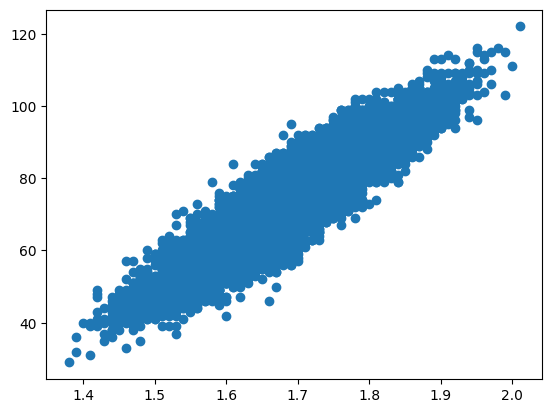

In [42]:
plt.scatter(df.Height, df.Weight)

In [43]:
## Crea una columna con las diferencia de cada caso respecto a su valor esperado
df['altura_menos_ve'] = df.Height - valor_esperado_altura
df['peso_menos_ve'] = df.Weight - valor_esperado_peso 
df

,Gender,Height,Weight,altura_menos_ve,peso_menos_ve,multiplicacion
0,Male,1.88,110.0,0.194309,36.7702,7.144781
1,Male,1.75,74.0,0.064309,0.7702,0.049531
2,Male,1.88,96.0,0.194309,22.7702,4.424455
3,Male,1.82,100.0,0.134309,26.7702,3.595479
4,Male,1.77,94.0,0.084309,20.7702,1.751115
...,...,...,...,...,...,...
9995,Female,1.68,62.0,-0.005691,-11.2298,0.063909
9996,Female,1.70,78.0,0.014309,4.7702,0.068257
9997,Female,1.62,58.0,-0.065691,-15.2298,1.000461
9998,Female,1.75,74.0,0.064309,0.7702,0.049531


In [44]:
### Vamos a multiplicar esas dos diferencias 
df['multiplicacion'] = df.altura_menos_ve * df.peso_menos_ve
df

,Gender,Height,Weight,altura_menos_ve,peso_menos_ve,multiplicacion
0,Male,1.88,110.0,0.194309,36.7702,7.144781
1,Male,1.75,74.0,0.064309,0.7702,0.049531
2,Male,1.88,96.0,0.194309,22.7702,4.424455
3,Male,1.82,100.0,0.134309,26.7702,3.595479
4,Male,1.77,94.0,0.084309,20.7702,1.751115
...,...,...,...,...,...,...
9995,Female,1.68,62.0,-0.005691,-11.2298,0.063909
9996,Female,1.70,78.0,0.014309,4.7702,0.068257
9997,Female,1.62,58.0,-0.065691,-15.2298,1.000461
9998,Female,1.75,74.0,0.064309,0.7702,0.049531


In [45]:
### Como interpretamos el signo de esa multiplicación

covarianza = df.multiplicacion.mean()
covarianza

1.3164892082

In [46]:
### Promedio de la multiplicación


*Si el promedio de la multiplicación es > 0 ¿Qué significa?*

*Si el promedio del a multiplicación < 0 ¿Qué significa?*

#### Covarianza:

Es una medida el movimiento relativo entre dos instrumentos.

Matemáticamente, si tenemos dos variables aleatorias $x_1$ y $x_2$ 

$$cov(x_1, x_2) = E[(x_1 - E[x_1])(x_2 - E[x_2])]$$

Al igual que la varianza, podemos transformar lo anterior en el promedio ponderado de las probabilidades

$$\text{cov}(x_1,x_2)=\sigma_{12}=\sum_{j=1}^{m}p_j(x_{1j}-E[x_1])(x_{2j}-E[x_2]).$$


¿Qué pasa cuando las probabilidades son iguales en cada caso?

$$\text{cov}(x_1,x_2)=  \sigma_{12}= \frac{1}{n} \sum_{j=1}^{m}(x_{1j}-E[x_1])(x_{2j}-E[x_2]).$$

***En cristiano: si no hay probabilidades por caso, la covarianza es el promedio de las multiplicaciones***


Ojo con esto:

$$cov(x_1, x_1) = Var(x_1)$$


$$cov(x_1, x_1) = E[(x_1 - E[x_1])(x_1 - E[x_1])]$$

$$cov(x_1, x_1) = E[(x_1 - E[x_1])^2]$$


In [47]:
## Obtenemos la covarianza


In [48]:
# Esto es lo mismo que el promedio de nuestra otra columna


***La covarianza por si sola no es interesante, el signo nos indica si hay una relación positiva entre las variables, pero solo eso***

Vamos a definir la correlación como lo siguiente


$$\text{corr}(r_1,r_2)=\rho_{12}=\rho_{21}=\frac{\sigma_{12}}{\sigma_1\sigma_{2}}.$$

***¿Qué es esto?***

Imaginemos que aplicamos esta transformación a una variable aleatoria que _siempre_ se mueve en la misma tendencia con otra

$$\text{corr}(r_1,r_1)=\rho_{11}=\frac{\sigma_{11}}{\sigma_1\sigma_1}=\frac{\sigma_{1}^2}{\sigma_1\sigma_1}=1.$$


La correlación nos sirve entonces para interpretar la covarianza


In [49]:
## Obtenemos la correlación
covarianza / (volatilidad_altura * volatilidad_peso) 

0.9241750936105904

## En realidad lo podemos hacer con pandas también

In [50]:
# A esto se le conoce como matriz de covarianza
#cuando se quiere seleccionar mas de una columna se tiene que poner doble corchete
df1 = df[['Height', 'Weight']]
df1.cov()

,Height,Weight
Height,0.009568,1.316621
Weight,1.316621,212.083000


In [51]:
# A esto se le conoce como matriz de correlación
df1.corr()

,Height,Weight
Height,1.000000,0.924268
Weight,0.924268,1.000000
